# Read SEG-Y with SegyIO

This is a new library from Statoil. 

In [1]:
import segyio

In [5]:
print(segyio.__doc__)


simple segy input/output

Welcome to segyio. For help, examples and reference, type `help(function)` in
your favourite python interpreter, or `pydoc function` in the unix console.

The segy library attempts to be easy to use efficently for prototyping and
interaction with possibly large segy files. File reading and writing is
streaming, with large file support out of the box and without hassle. For a
quick start on reading files, type `help(segyio.open)`.

An open segy file is interacted with in modes, found in the segy module. For a
reference with examples, please type `help(segyio.segy)`. For documentation on
individual modes, please refer to the individual modes with
`help(segyio.SegyFile.[mode])`, or look it up in the aggregated segyio.segy.
The available modes are:
    * text, for textual headers including extended headers
    * bin, for the binary header
    * header, for the trace headers
    * trace, for trace data
    * iline, for inline biased operations
    * xline, for cro

## Basics

In [3]:
s = segyio.open('../data/Penobscot_0-1000ms.sgy')

In [6]:
s.bin

{JobID: 1, TraceFlag: 1, LineNumber: 0, ReelNumber: 0, Traces: 0, AuxTraces: 0, Interval: 4000, IntervalOriginal: 0, Samples: 251, SamplesOriginal: 0, Format: 5, EnsembleFold: 0, SortingCode: 4, ExtendedHeaders: 0, VerticalSum: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SEGYRevision: 256, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 0, BinaryGainRecovery: 0, AmplitudeRecovery: 0, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0}

In [7]:
# Read text header?

In [8]:
s.close()

## Access the data

In [9]:
with segyio.open('../data/Penobscot_0-1000ms.sgy') as s:
    c = segyio.cube(s)

`c` is just an `ndarray`.

In [10]:
type(c)

numpy.ndarray

In [11]:
c.shape

(601, 481, 251)

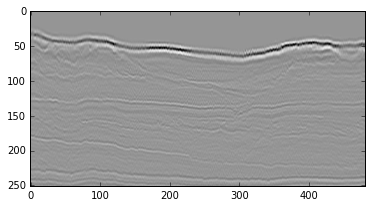

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(c[100].T, cmap='Greys')

## 2D data

https://github.com/agile-geoscience/geocomputing/blob/master/data/HUN00-ALT-01_STK.sgy

This file does not open with the default `strict=True`:

In [13]:
with segyio.open('../data/HUN00-ALT-01_STK.sgy') as s:
    c = segyio.cube(s)

RuntimeError: Unable to determine sorting. File may be corrupt.

It's OK if not strict... but then you can't use `cube`

In [14]:
with segyio.open('../data/HUN00-ALT-01_STK.sgy', strict=False) as s:
    c = segyio.cube(s)

TypeError: object of type 'NoneType' has no len()

So we'll unpack the traces manually... 

In [17]:
import numpy as np

with segyio.open('../data/HUN00-ALT-01_STK.sgy', strict=False) as s:
    data = np.stack(t.astype(np.float) for t in s.trace)

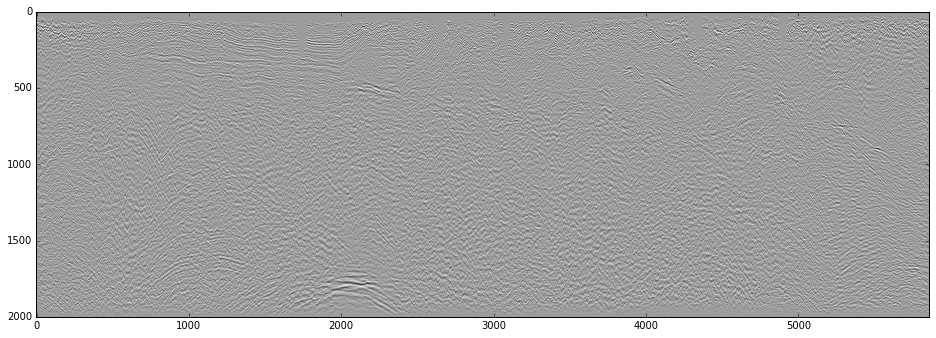

In [18]:
plt.figure(figsize=(16, 8))
plt.imshow(data.T, cmap='Greys')
plt.show()

## Try another

In [19]:
with segyio.open('../../seisplot/data/31_81_PR.sgy') as s:
    c = segyio.cube(s)

In [20]:
c.shape

(1, 1, 534, 1501)

OK, I guess this isn't quite the flow for a 2D file... 

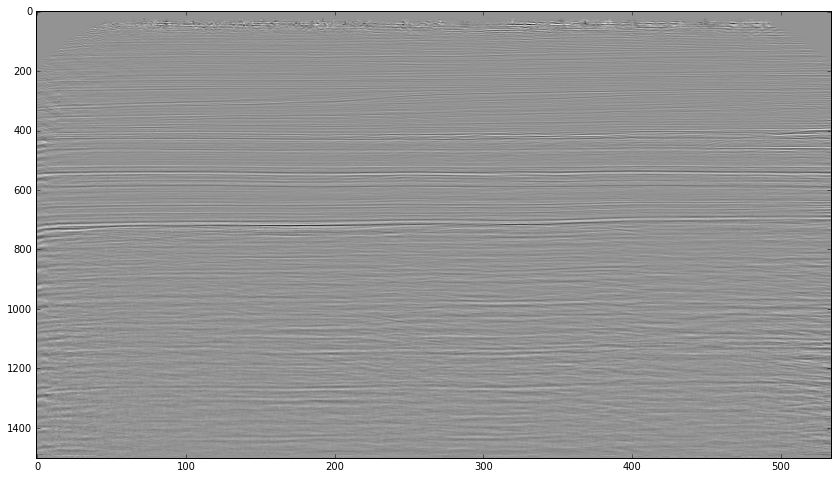

In [21]:
plt.figure(figsize=(16, 8))
plt.imshow(np.squeeze(c).T, cmap='Greys', aspect=0.2)

## Another, known to be 'weird'

In [22]:
with segyio.open('../data/marmousi/velocity.segy') as s:
    print("weird dt: ", segyio.dt(s))
    c = segyio.cube(s)

weird dt:  2304.0


This file is improperly organized (time first) and the dt header is wrong.

In [23]:
data = np.squeeze(c)

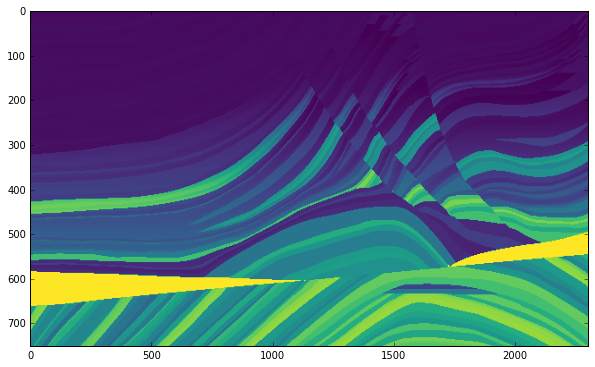

In [24]:
plt.figure(figsize=(10, 6))
plt.imshow(data, cmap='viridis', aspect='auto')
plt.show()